# 1. Import thư viện

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics.pairwise import cosine_similarity

# 2. Collecting data

## 2.1 What subject is your data about? What is the source of your data?

- **Subject:** Dữ liệu sách trên Goodreads Best Book Ever năm 2021.<br>
- **Source:** https://www.kaggle.com/datasets/shashwatwork/best-book-ever-data-for-2021/data

## 2.2 Do authors of this data allow you to use like this? You can check the data license

- **Share** - sao chép và phân phối lại dataset ở bất kỳ phương tiện hoặc định dạng nào
- **Adapt** - phối lại, biến đổi và xây dựng dựa trên dataset

## 2.3 How did authors collect data?

Dataset đã được thu thập trong khung Prac1 của chủ đề Tipology and Data Life Cycle của Bằng Thạc sĩ Khoa học dữ liệu của Đại học Oberta de Catalunya (UOC).

# 3. Exploring data

In [2]:
df = pd.read_csv("books_1.Best_Books_Ever.csv")
df.head(10)

,bookId,title,series,author,rating,description,language,isbn,genres,characters,...,firstPublishDate,awards,numRatings,ratingsByStars,likedPercent,setting,coverImg,bbeScore,bbeVotes,price
0,2767052-the-hunger-games,The Hunger Games,The Hunger Games #1,Suzanne Collins,4.33,WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...,English,9780439023481,"['Young Adult', 'Fiction', 'Dystopia', 'Fantas...","['Katniss Everdeen', 'Peeta Mellark', 'Cato (H...",...,NaN,['Locus Award Nominee for Best Young Adult Boo...,6376780,"['3444695', '1921313', '745221', '171994', '93...",96.0,"['District 12, Panem', 'Capitol, Panem', 'Pane...",https://i.gr-assets.com/images/S/compressed.ph...,2993816,30516,5.09
1,2.Harry_Potter_and_the_Order_of_the_Phoenix,Harry Potter and the Order of the Phoenix,Harry Potter #5,"J.K. Rowling, Mary GrandPré (Illustrator)",4.50,There is a door at the end of a silent corrido...,English,9780439358071,"['Fantasy', 'Young Adult', 'Fiction', 'Magic',...","['Sirius Black', 'Draco Malfoy', 'Ron Weasley'...",...,06/21/03,['Bram Stoker Award for Works for Young Reader...,2507623,"['1593642', '637516', '222366', '39573', '14526']",98.0,['Hogwarts School of Witchcraft and Wizardry (...,https://i.gr-assets.com/images/S/compressed.ph...,2632233,26923,7.38
2,2657.To_Kill_a_Mockingbird,To Kill a Mockingbird,To Kill a Mockingbird,Harper Lee,4.28,The unforgettable novel of a childhood in a sl...,English,9999999999999,"['Classics', 'Fiction', 'Historical Fiction', ...","['Scout Finch', 'Atticus Finch', 'Jem Finch', ...",...,07/11/60,"['Pulitzer Prize for Fiction (1961)', 'Audie A...",4501075,"['2363896', '1333153', '573280', '149952', '80...",95.0,"['Maycomb, Alabama (United States)']",https://i.gr-assets.com/images/S/compressed.ph...,2269402,23328,NaN
3,1885.Pride_and_Prejudice,Pride and Prejudice,NaN,"Jane Austen, Anna Quindlen (Introduction)",4.26,Alternate cover edition of ISBN 9780679783268S...,English,9999999999999,"['Classics', 'Fiction', 'Romance', 'Historical...","['Mr. Bennet', 'Mrs. Bennet', 'Jane Bennet', '...",...,01/28/13,[],2998241,"['1617567', '816659', '373311', '113934', '767...",94.0,"['United Kingdom', 'Derbyshire, England (Unite...",https://i.gr-assets.com/images/S/compressed.ph...,1983116,20452,NaN
4,41865.Twilight,Twilight,The Twilight Saga #1,Stephenie Meyer,3.60,About three things I was absolutely positive.\...,English,9780316015844,"['Young Adult', 'Fantasy', 'Romance', 'Vampire...","['Edward Cullen', 'Jacob Black', 'Laurent', 'R...",...,10/05/05,"['Georgia Peach Book Award (2007)', 'Buxtehude...",4964519,"['1751460', '1113682', '1008686', '542017', '5...",78.0,"['Forks, Washington (United States)', 'Phoenix...",https://i.gr-assets.com/images/S/compressed.ph...,1459448,14874,2.1
5,19063.The_Book_Thief,The Book Thief,NaN,Markus Zusak (Goodreads Author),4.37,Librarian's note: An alternate cover edition c...,English,9780375831003,"['Historical Fiction', 'Fiction', 'Young Adult...","['Liesel Meminger', 'Hans Hubermann', 'Rudy St...",...,09/01/05,['National Jewish Book Award for Children’s an...,1834276,"['1048230', '524674', '186297', '48864', '26211']",96.0,"['Molching (Germany)', 'Germany']",https://i.gr-assets.com/images/S/compressed.ph...,1372809,14168,3.8
6,170448.Animal_Farm,Animal Farm,NaN,"George Orwell, Russell Baker (Preface), C.M. W...",3.95,Librarian's note: There is an Alternate Cover ...,English,9780451526342,"['Classics', 'Fiction', 'Dystopia', 'Fantasy',...","['Snowball', 'Napoleon', 'Clover', 'Boxer', 'O...",...,08/17/45,"['Prometheus Hall of Fame Award (2011)', 'Retr...",2740713,"['986764', '958699', '545475', '165093', '84682']",91.0,"['England', 'United Kingdom']",https://i.gr-assets.com/images/S/compressed.ph...,1276599,13264,4.42
7,11127.The_Chronicles_of_Narnia,The Chronicles of Narnia,The Chronicles of Narnia (Publication Order) #1–7,"C.S. Lewis, Pauline Baynes (Illustrator)",4.26,"Journeys to the end of the world, fantastic cr...",English,9999999999999,"['Fantasy', 'Classics', 'Fiction', 'Youn

## 3.1 How many rows and how many columns?

In [3]:
n_rows = df.shape[0]
n_cols = df.shape[1]
print("Number of rows: ",n_rows)
print("Number of columns: ",n_cols)

Number of rows:  52478
Number of columns:  25


## 3.2 What is the meaning of each row?

Mỗi dòng trong dataset sẽ đại diện cho một cuốn sách, phân biệt bằng thuộc tính "bookId", chứa những thuộc tính bao gồm thông tin của cuốn sách đó bao gồm tên sách, tác giả, thể loại,...

## 3.3 Are there duplicated rows?

In [4]:
def check_duplicated(df):
    if (sum(df.duplicated()) > 0):
        print("There are duplicated rows, number of duplicated rows: ",sum(df.duplicated()))
    else:
        print("There is no duplicated row.")

check_duplicated(df)

There are duplicated rows, number of duplicated rows:  50


Sau khi drop duplicate:

In [5]:
#remove duplicated rows
df = df.drop_duplicates()
check_duplicated(df)

There is no duplicated row.


## 3.4 What is the meaning of each column?

- bookId: Định danh của sách trên goodreads.com
- title: Tiêu đề sách
- series: Tên thứ tự sách trong một chuỗi loạt sách
- author: Tác giả của sách
- rating: Điểm đánh giá toàn cầu trên Goodreads
- description: Mô tả về sách
- language: Ngôn ngữ của sách
- isbn: Số ISBN của sách
- genres: Thể loại của sách
- characters: Nhân vật chính trong sách
- bookFormat: Loại bìa sách
- edition: Loại bản sách (ví dụ: Bản kỷ niệm)
- pages: Số trang của sách
- publisher: Nhà xuất bản
- publishDate: Ngày xuất bản
- firstPublishDate: Ngày xuất bản của bản đầu tiên
- awards: Danh sách các giải thưởng
- numRatings: Tổng số lượt đánh giá
- ratingsByStars: Số lượt đánh giá từng theo sao
- likedPercent: Phần trăm số lượt đánh giá từ 2 sao trở lên (như trên Goodreads)
- setting: Bối cảnh của câu chuyện
- coverImg: Đường link đến hình ảnh bìa sách
- bbeScore: Điểm trong danh sách "Best Books Ever"
- bbeVotes: Số phiếu bầu trong danh sách "Best Books Ever"
- price: Giá sách (trích xuất từ Iberlibro)


## 3.5 What is the current data type of each column? Are there columns having inappropriate data types?

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52428 entries, 0 to 52477
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   bookId            52428 non-null  object 
 1   title             52428 non-null  object 
 2   series            23445 non-null  object 
 3   author            52428 non-null  object 
 4   rating            52428 non-null  float64
 5   description       51092 non-null  object 
 6   language          48627 non-null  object 
 7   isbn              52428 non-null  object 
 8   genres            52428 non-null  object 
 9   characters        52428 non-null  object 
 10  bookFormat        50955 non-null  object 
 11  edition           4949 non-null   object 
 12  pages             50085 non-null  object 
 13  publisher         48736 non-null  object 
 14  publishDate       51549 non-null  object 
 15  firstPublishDate  31125 non-null  object 
 16  awards            52428 non-null  object

Do cột 'price' có quá nhiều missing value, và ta không cần dùng đến nó cho phần phân tích dữ liệu, nên drop cột này.

In [7]:
df.drop('price',axis=1,inplace=True)

Có, các cột bị sai kiểu dữ liệu chẳng hạn như:
- pages: nên là numeric thay vì object.
- publishDate: nên là datetime thay vì object.
- firstPublishDate: nên là datetime thay vì object.
- ratingsByStars: là dạng string list của số lượt đánh giá theo từng sao, ta sẽ chia thành 5 cột.
- setting: dạng string list chuyển sang list.
- genres: dạng string list chuyển sang list.
- author: dạng string (chuỗi các tác giả) sang list các tác giả.
- characters: dạng string list chuyển sang list.

In [8]:
#Fix data type
df["pages"] = pd.to_numeric(df["pages"], errors='coerce')

In [9]:
date_formats = [
    '%m/%d/%y', '%B %dth %Y', '%B %dst %Y', '%B %dnd %Y', '%B %drd %Y', 'Y', '%B %Y', "%b-%y"
]
def convert_to_date(date_str):
    for fmt in date_formats:
        try:
            new_date = pd.to_datetime(date_str, format=fmt)
            if new_date.year > 2023:
                return new_date.replace(year=new_date.year - 100)
            return pd.to_datetime(date_str, format=fmt)
        except ValueError:
            pass
    return pd.NaT

df['publishDate'] = df['publishDate'].apply(convert_to_date)
df['firstPublishDate'] = df['firstPublishDate'].apply(convert_to_date)

In [10]:
df['publishDate']

0       2008-09-14
1       2004-09-28
2       2006-05-23
3       2000-10-10
4       2006-09-06
           ...    
52473   2011-05-28
52474   2011-08-05
52475   2011-03-18
52476   2011-09-01
52477   2011-05-08
Name: publishDate, Length: 52428, dtype: datetime64[ns]

In [11]:
df['awards']

0        ['Locus Award Nominee for Best Young Adult Boo...
1        ['Bram Stoker Award for Works for Young Reader...
2        ['Pulitzer Prize for Fiction (1961)', 'Audie A...
3                                                       []
4        ['Georgia Peach Book Award (2007)', 'Buxtehude...
                               ...                        
52473                                                   []
52474                                                   []
52475              ["Readers' Favorite Book Award (2011)"]
52476                                                   []
52477                                                   []
Name: awards, Length: 52428, dtype: object

In [12]:
def convert_to_list(x):
    return x[1:-1].replace("'","").split(', ')

In [13]:
df['awards'] = df['awards'].apply(lambda x: convert_to_list(x))
df['awards'] = df['awards'].apply(lambda x: [y.replace('"',"") for y in x])

In [14]:
df['ratingsByStars'] = df['ratingsByStars'].apply(lambda x: convert_to_list(x))
df['ratingsByStars'] = df['ratingsByStars'].apply(lambda x : [int(y) for y in x if y.isdigit()])

In [15]:
df['setting'] = df['setting'].apply(lambda x: convert_to_list(x))

In [16]:
df['genres'] = df['genres'].apply(lambda x: convert_to_list(x))

In [17]:
df['characters'] = df['characters'].apply(lambda x: convert_to_list(x))

In [18]:
df['ratingsByStars'][0]

[3444695, 1921313, 745221, 171994, 93557]

In [19]:
df[['5_star', '4_star', '3_star', '2_star', '1_star']] = df['ratingsByStars'].apply(pd.Series)

<ipython-input-19-d6e0f1ab0eb0>:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df[['5_star', '4_star', '3_star', '2_star', '1_star']] = df['ratingsByStars'].apply(pd.Series)


In [20]:
df['1_star']

0         93557.0
1         14526.0
2         80794.0
3         76770.0
4        548674.0
           ...   
52473        11.0
52474         0.0
52475       390.0
52476         5.0
52477         8.0
Name: 1_star, Length: 52428, dtype: float64

In [21]:
df = df.drop(['ratingsByStars'],axis=1)

In [22]:
def remove_parentheses(entry):
    '''
    Remove role in author strings
    '''
    return re.sub(r'\([^)]*\)', '', entry)
df['author'] = df['author'].apply(lambda x: remove_parentheses(x.replace(", more…","")).split(', '))

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52428 entries, 0 to 52477
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   bookId            52428 non-null  object        
 1   title             52428 non-null  object        
 2   series            23445 non-null  object        
 3   author            52428 non-null  object        
 4   rating            52428 non-null  float64       
 5   description       51092 non-null  object        
 6   language          48627 non-null  object        
 7   isbn              52428 non-null  object        
 8   genres            52428 non-null  object        
 9   characters        52428 non-null  object        
 10  bookFormat        50955 non-null  object        
 11  edition           4949 non-null   object        
 12  pages             50062 non-null  float64       
 13  publisher         48736 non-null  object        
 14  publishDate       4560

**Nhận xét: Cột "pages" có giá trị float thay vì int vì có cột này chứa missing value, pandas sử dụng numpy để xử lý nên numpy hiểu các missing value (NaN) dạng float.**

## 3.6 With each numerical column, how are values distributed?

In [24]:
df.describe()

,rating,pages,numRatings,likedPercent,bbeScore,bbeVotes,5_star,4_star,3_star,2_star,1_star
count,52428.000000,50062.000000,5.242800e+04,51807.000000,5.242800e+04,52428.000000,5.100600e+04,5.100600e+04,5.100600e+04,51006.000000,51006.000000
mean,4.021865,328.706664,1.789260e+04,92.231938,1.985832e+03,22.549535,7.490740e+03,6.147517e+03,3.411688e+03,928.435910,412.779987
std,0.367116,252.264913,1.039932e+05,5.988683,3.516985e+04,369.333934,5.144225e+04,3.206654e+04,1.720328e+04,5659.912855,3765.856356
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,-4.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,3.820000,210.000000,3.410000e+02,90.000000,8.400000e+01,1.000000,1.460000e+02,1.340000e+02,7.800000e+01,19.000000,7.000000
50%,4.030000,304.000000,2.309500e+03,94.000000,9.700000e+01,1.000000,8.840000e+02,8.340000e+02,4.900000e+02,117.000000,39.000000
75%,4.230000,392.000000,9.389000e+03,96.000000,1.870000e+02,2.000000,3.567750e+03,3.375000e+03,1.957750e+03,475.000000,163.000000
max,5.000000,14777.000000,7.048471e+06,100.000000,2.993816e+06,30516.000000,4.578137e+06,1.921313e+06,1.008686e+06,542017.000000,548674.000000


In [25]:
numerical_df = df.select_dtypes(include=np.number)
numerical_df

,rating,pages,numRatings,likedPercent,bbeScore,bbeVotes,5_star,4_star,3_star,2_star,1_star
0,4.33,374.0,6376780,96.0,2993816,30516,3444695.0,1921313.0,745221.0,171994.0,93557.0
1,4.50,870.0,2507623,98.0,2632233,26923,1593642.0,637516.0,222366.0,39573.0,14526.0
2,4.28,324.0,4501075,95.0,2269402,23328,2363896.0,1333153.0,573280.0,149952.0,80794.0
3,4.26,279.0,2998241,94.0,1983116,20452,1617567.0,816659.0,373311.0,113934.0,76770.0
4,3.60,501.0,4964519,78.0,1459448,14874,1751460.0,1113682.0,1008686.0,542017.0,548674.0
...,...,...,...,...,...,...,...,...,...,...,...
52473,4.00,0.0,871,94.0,0,1,311.0,310.0,197.0,42.0,11.0
52474,4.19,190.0,37,95.0,0,1,16.0,14.0,5.0,2.0,0.0
52475,3.70,280.0,6674,84.0,0,1,2109.0,1868.0,1660.0,647.0,390.0
52476,3.85,507.0,238,90.0,0,1,77.0,78.0,59.0,19.0,5.0


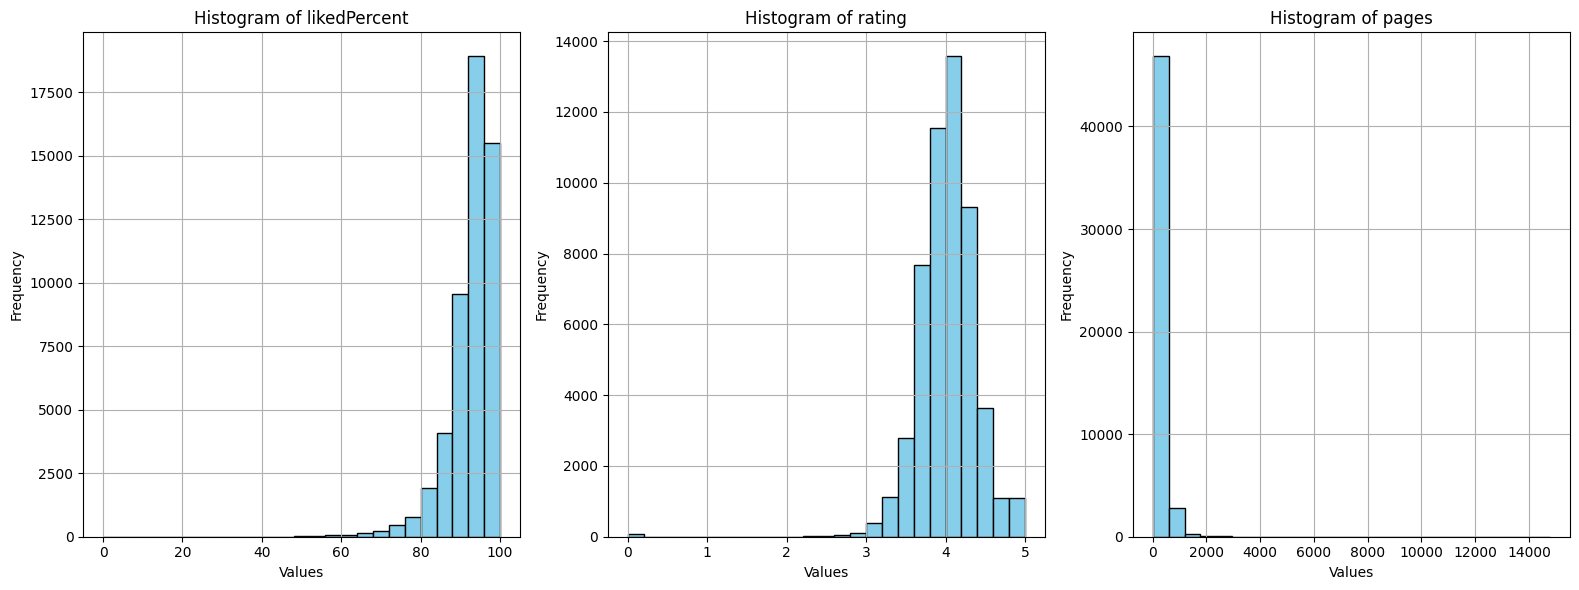

In [26]:
cols = ['likedPercent','rating','pages']
num_cols_count = len(cols)
fig, axes = plt.subplots(1, num_cols_count, figsize=(16, 6))
for i, col in enumerate(cols):
    min_val = numerical_df[col].min()
    max_val = numerical_df[col].max()
    axes[i].hist(numerical_df[col], bins=25, range=(min_val, max_val), color='skyblue', edgecolor='black')
    axes[i].set_xlabel('Values')
    axes[i].set_ylabel('Frequency')
    axes[i].set_title(f'Histogram of {col}')
    axes[i].grid(True)

plt.tight_layout()
plt.show()

In [27]:
df.loc[numerical_df[numerical_df['pages'] > 2000].index,:'title']

,bookId,title
143,114345.The_Little_House_Collection,The Little House Collection
409,862041.Harry_Potter_Series_Box_Set,Harry Potter Series Box Set
1095,3579.The_Complete_Anne_of_Green_Gables_Boxed_Set,The Complete Anne of Green Gables Boxed Set
1592,18796.In_Search_of_Lost_Time,In Search of Lost Time
1679,12177850-a-song-of-ice-and-fire,A Song of Ice and Fire
...,...,...
46911,15041842-the-sandman-volumes-1-10,The Sandman Volumes 1-10
49197,21266675-the-complete-secret-seven-library,The Complete Secret Seven Library
50396,26870789-iron-fey,Iron Fey: The Iron King / Winter's Passage / T...
50744,18490595-zibaldone,Zibaldone


**Nhận xét**:
- Hầu như tất cả các cuốn sách đều có phần trăm lượt thích hơn 60%, phần lớn những cuốn sách hơn 60% đều nằm trong khoảng 95-100%.
- Về phần đánh giá, các cuốn sách đều có rating khoảng 2.5 sao trở lên, hầu hết nằm ở 4 sao gồm gần 14000, các cuốn sách hay, đạt đánh giá cực tốt (5 sao), chiếm tỉ lệ khá thấp chỉ hơn 1000 cuốn sách trong khoảng hơn 50000.
- Các cuốn sách trung bình đều có số trang ít hơn 1000, có những cuốn sách dài tập > 2000 trang chẳng hạn như Harry Potter.

### 3.6.1 What is the percentage of missing values?

In [28]:
def missing_ratio(input):
    return (input.isnull().sum() / len(input) * 100).round(1)


df_describe = df.select_dtypes(include=np.number)
df_describe = df_describe.agg([missing_ratio])
df_describe

,rating,pages,numRatings,likedPercent,bbeScore,bbeVotes,5_star,4_star,3_star,2_star,1_star
missing_ratio,0.0,4.5,0.0,1.2,0.0,0.0,2.7,2.7,2.7,2.7,2.7


Chỉ một phần nhỏ có missing value (< 30%) không ảnh hưởng nhiều tới số liệu ta cần phân tích.

### 3.6.2 Min? max? Are they abnormal?

In [29]:
df_describe = df.select_dtypes(include=np.number)
df_describe = df_describe.agg(["min", "max"])
df_describe

,rating,pages,numRatings,likedPercent,bbeScore,bbeVotes,5_star,4_star,3_star,2_star,1_star
min,0.0,0.0,0,0.0,0,-4,0.0,0.0,0.0,0.0,0.0
max,5.0,14777.0,7048471,100.0,2993816,30516,4578137.0,1921313.0,1008686.0,542017.0,548674.0


Có vẻ như trong các cột dữ liệu dạng số, cột "bbeVotes" bất thường vì min của cột này là -4, trong khi cột này thể số phiếu bầu trong danh sách "Best Books Ever", nghĩa là luôn không âm. Các cột còn lại đều đúng và thỏa mãn.

In [30]:
#Fix "bbeVotes"
df.loc[df["bbeVotes"] < 0, "bbeVotes"] = 0

In [31]:
df_describe = df.select_dtypes(include=np.number)
df_describe = df_describe.agg(["min", "max"])
df_describe

,rating,pages,numRatings,likedPercent,bbeScore,bbeVotes,5_star,4_star,3_star,2_star,1_star
min,0.0,0.0,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0
max,5.0,14777.0,7048471,100.0,2993816,30516,4578137.0,1921313.0,1008686.0,542017.0,548674.0


## 3.7 With each categorical column, how are values distributed?

* Tìm số unique genres:

In [32]:
unique_genres = []
for sublist in df['genres']:
    for genre in sublist:
        if genre not in unique_genres:
            unique_genres.append(genre)
unique_genres.remove('')

In [33]:
len(unique_genres)

982

### 3.7.1 What is the percentage of missing values?

In [34]:
df_describe = df.select_dtypes(exclude=np.number)
df_describe = df_describe.agg([missing_ratio])
df_describe

,bookId,title,series,author,description,language,isbn,genres,characters,bookFormat,edition,publisher,publishDate,firstPublishDate,awards,setting,coverImg
missing_ratio,0.0,0.0,55.3,0.0,2.5,7.2,0.0,0.0,0.0,2.8,90.6,7.0,13.0,42.6,0.0,0.0,1.2


edition, series, firstPublishDate có nhiều giá trị missing value (> 30%) ta nên drop những cột đó.

In [35]:
df = df.drop(['edition'],axis=1)

In [36]:
df = df.drop(['series'],axis=1)

In [37]:
df = df.drop(['firstPublishDate'],axis=1)

In [38]:
df_describe = df.select_dtypes(exclude=np.number)
df_describe = df_describe.agg([missing_ratio])
df_describe

,bookId,title,author,description,language,isbn,genres,characters,bookFormat,publisher,publishDate,awards,setting,coverImg
missing_ratio,0.0,0.0,0.0,2.5,7.2,0.0,0.0,0.0,2.8,7.0,13.0,0.0,0.0,1.2


### 3.7.2 How many different values? Show a few

In [39]:
cols = ['language','isbn','bookFormat','publisher']
for col in cols:
    print(df[col].value_counts())

English                                  42635
Arabic                                    1036
Spanish                                    684
French                                     576
German                                     525
                                         ...  
Aromanian; Arumanian; Macedo-Romanian        1
Basque                                       1
Faroese                                      1
Iranian (Other)                              1
Norwegian Nynorsk; Nynorsk, Norwegian        1
Name: language, Length: 81, dtype: int64
9999999999999    4350
9780312429980       2
9780515048742       2
9780765326355       2
9780446677844       2
                 ... 
9781563899294       1
9780976140733       1
9780446605151       1
9780316036184       1
9781599554976       1
Name: isbn, Length: 48072, dtype: int64
Paperback                26748
Hardcover                12257
Kindle Edition            5824
Mass Market Paperback     2566
ebook                     2545
     

In [40]:
multi_answer_cols = ['author','genres','setting','awards','characters']
survey_df = df[multi_answer_cols]
count_unique = lambda x: len(x.explode().value_counts())
distribution = lambda x: dict(x.explode().value_counts())
multiple_cate_profile = survey_df.agg([count_unique,distribution])
multiple_cate_profile.index = ["num_diff_vals", "distribution"]
del multiple_cate_profile['setting']['distribution']['']
del multiple_cate_profile['awards']['distribution']['']
del multiple_cate_profile['characters']['distribution']['']

In [41]:
multiple_cate_profile

,author,genres,setting,awards,characters
num_diff_vals,33697,983,4186,15714,48614
distribution,"{'Stephen King ': 104, 'Nora Roberts ': 103, '...","{'Fiction': 31605, 'Romance': 15482, 'Fantasy'...","{'England': 1331, 'United States of America': ...",{'LovelyBooks Leserpreis Nominee for Allgemein...,"{'Bruce Wayne': 51, 'Eve Dallas': 49, 'Roarke'..."


<ipython-input-42-1edb772beaeb>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i,j].set_xticklabels(keys, rotation=45, ha='right')


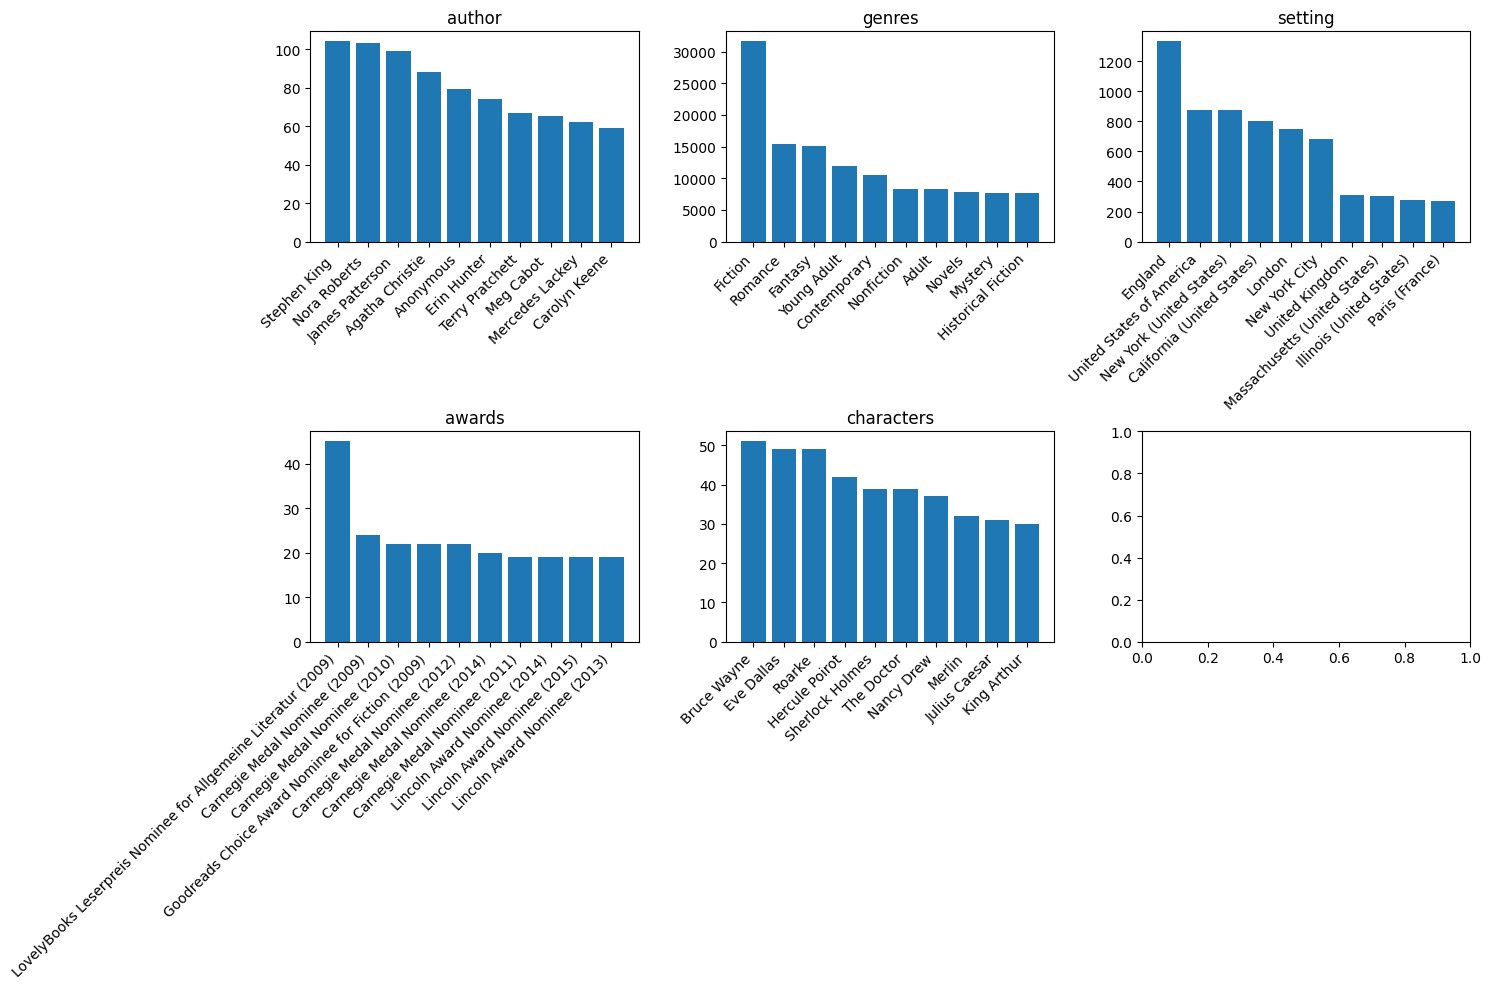

In [42]:
fig, ax = plt.subplots(2,3,figsize = (15,10))
for i in range(2):
    for j in range(3):
        if i * 3 + j < multiple_cate_profile.shape[1]:
            distribution = multiple_cate_profile.iloc[:,i * 3 + j][1]
            top_values = sorted(distribution.items(), key=lambda x: x[1], reverse=True)[:10]
            keys, values = zip(*top_values)
            ax[i,j].bar(keys, values)
            ax[i,j].set_xticklabels(keys, rotation=45, ha='right')
            ax[i,j].set_title(multiple_cate_profile.columns[i * 3 + j])
plt.tight_layout()
plt.show()

**Nhận xét**:
- Fiction, Romance là 2 thể loại chủ đề xuất hiện nhiều nhất trong kho tàng GoodReads. Các thể loại ít nổi hơn chẳng hạn như Fantasy, Young Adult, Contemporary cũng được nhiều tác giả viết.
- Hầu như các bối cảnh của truyện đều là ở Anh Quốc hoặc Hoa Kỳ, Pháp cũng là một nơi lý tưởng để phát triển bối cảnh câu chuyện.
- Các giải thưởng sách thường thấy nhất là LovelyBooks Leserpreis Nominee for Allgemeine Literatur (2009), chỉ gồm hơn 40 cuốn sách đạt được giải, nối tiếp là các giải thưởng khác ít sách đạt được hơn.

### 3.7.3 Are they abnormal?
Có những giá trị string null như "" trong cột setting và awards, điều này cho thấy cuốn sách đấy không có setting, hoặc không đạt được giải thưởng nào.

# 4. Asking meaningful questions

## 4.1 Question 1

**Question:** Dựa vào dataset trên, tôi nên theo dõi những tác giả nào hơn?

**Idea**: Dựa vào số lượng giải thưởng các tác giả đạt được để dự đoán chuyên môn của tác giả, càng nhiều giải thưởng thì càng khuyến khích đọc các tác phẩm của tác giả này.

**Benefits of finding the answer:**
- Xếp loại số lượng giải thưởng của các tác giả để có thể tìm đọc những cuốn sách hay nhưng ít nổi tiếng hơn của những tác giả đó.

## 4.2 Question 2

**Question:** Xu hướng các thể loại sách được viết ra theo từng giai đoạn thay đổi như thế nào?

**Idea**: Lấy 5 thể loại có tỉ lệ xuất hiện cao nhất theo 4 thời kì (1900-2000); (2000-2010); (2010-2015); (2015-2022).

**Benefits of finding the answer:**
- Hiểu rõ hơn về sự phát triển của văn hóa và xã hội.
- Xu hướng phát triển của các thể loại sách theo từng thời kì.

## 4.3 Question 3

**Question:** Làm sao để tìm đọc những cuốn sách tương tự với một cuốn sách mình yêu thích?

**Idea**: Xây dựng recommender system gợi ý 5 cuốn sách dựa trên thể loại và ratings của một cuốn sách.

**Benefits of finding the answer:**
- Giúp người đọc khám phá những cuốn sách mới vừa có nhiều điểm tương đồng so với cuốn sách mà người đó thích, vừa có ratings trung bình cao.
- Tăng trải nghiệm đọc sách

# 4.4 Question 4

**Question**: Thể loại (genres) thường viết của tác giả là gì?

**Idea**: Ứng với mỗi tác giả, đếm số lượng thể loại mà tác giả đã tham gia.

**What are benefits of finding the answer?**
- Đầu tiên là nhu cầu muốn biết tác giả thường có xu hướng viết thể loại nào --> cho fan, cũng như đầu tư vào.
- Hoặc ngược lại, có thể hoàn toàn nếu yêu thích thể loại đó, ta thường muốn đọc từ tác giả này.
- Đánh nhãn được các dòng thể loại chính của tác giả -> Xây dựng hệ thống quản lý sách.

# 5. Preprocessing + analyzing data to answer each question

## 5.1 Question 1: Dựa vào dataset trên, tôi nên theo dõi những tác giả nào hơn?

### 5.1.1 Does it need to have preprocessing step, and if yes, how does your group preprocess?

**Text**

- Tạo một dataframe mới theo dataframe cũ.
- Tiếp theo loại bỏ các dòng không có giải thưởng.
- Explode cột author ra thành nhiều dòng.

**Code**

In [43]:
Q1_df = df.copy()
Q1_df = Q1_df[Q1_df['awards'].apply(lambda x: x != [''])]

In [44]:
Q1_df = Q1_df.explode('author').reset_index()

### 5.1.2 How does your group analyze data to answer the question?

**Text**
- Lấy ra hai cột cần sử dụng là author và awards.
- Groupby theo author rồi tính số lượng giải thưởng của từng author đó.
- Vẽ biểu đồ thể hiện 20 tác giả có số giải thưởng cao nhất.

**Code**

In [45]:
Q1_df = Q1_df[['author','awards']]

In [46]:
Q1_df = Q1_df.groupby('author')['awards'].count().reset_index()
Q1_df

,author,awards
0,A'Mera Frieman,1
1,A. Lee Martinez,1
2,A. Manette Ansay,1
3,A. Samad Said,1
4,A. Scott Berg,1
...,...,...
8170,芦奈野 ひとし,1
8171,苟利军,1
8172,貴志 祐介,1
8173,郭清玲,1


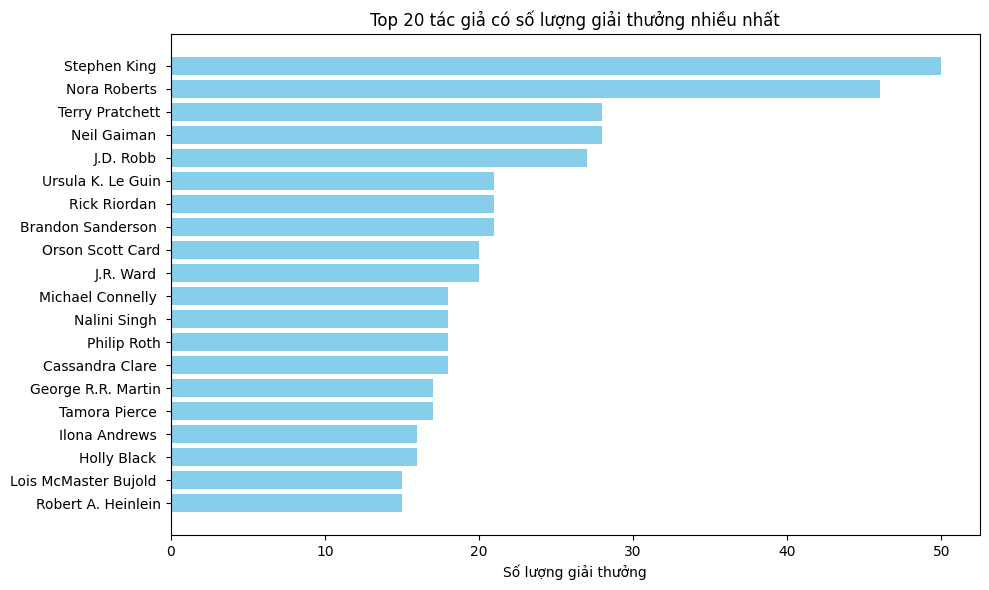

In [47]:
top_20_authors = Q1_df.sort_values(by='awards', ascending=False).head(20)
plt.figure(figsize=(10, 6))
plt.barh(top_20_authors['author'], top_20_authors['awards'], color='skyblue')
plt.xlabel('Số lượng giải thưởng')
plt.title('Top 20 tác giả có số lượng giải thưởng nhiều nhất')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

## 5.2 Question 2: Xu hướng các thể loại sách được viết ra theo từng giai đoạn thay đổi như thế nào?

### 5.2.1 Does it need to have preprocessing step, and if yes, how does your group preprocess?

**Text**

- Đầu tiên ta tiến hành loại bỏ những giá trị Nan trong cột PublishDate và gắn vào DataFrame survey_df
- Tiếp theo sẽ tạo ra 1 columns mới với giá trị là Năm của "publishDate"
- Tiến hành sắp xếp data tăng dần theo số Năm
- Loại bỏ dòng đầu tiên vì đó giá trị của nó là []

**Code**

In [48]:
surver_df = df[df['publishDate'].notna()]
surver_df['publishDate_Year'] = surver_df['publishDate'].apply(lambda x: x.year)
surver_df = surver_df[['genres','publishDate_Year']].sort_values(by = 'publishDate_Year').iloc[1:,:]

<ipython-input-48-ffc9d71b1196>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  surver_df['publishDate_Year'] = surver_df['publishDate'].apply(lambda x: x.year)


### 5.2.2 How does your group analyze data to answer the question?

**Text**

- Chọn ra 4 giai đoạn để so sánh là (1900,2000),(2000,2010),(2010,2015),(2015,2022)
- Với mỗi giai đoạn:
    - Vì mỗi phim chứa 1 list các thể loại nên em dùng explode để phân tách ra.
    - Dùng value_counts() để tìm ra số lần xuất của các thể loại đó và chọn ra top 5 có số lần xuất hiện nhiều nhất
    - Chia cho tổng số thể loại để lấy %
- Dùng for để duyệt qua 4 giai đoạn

**Code**

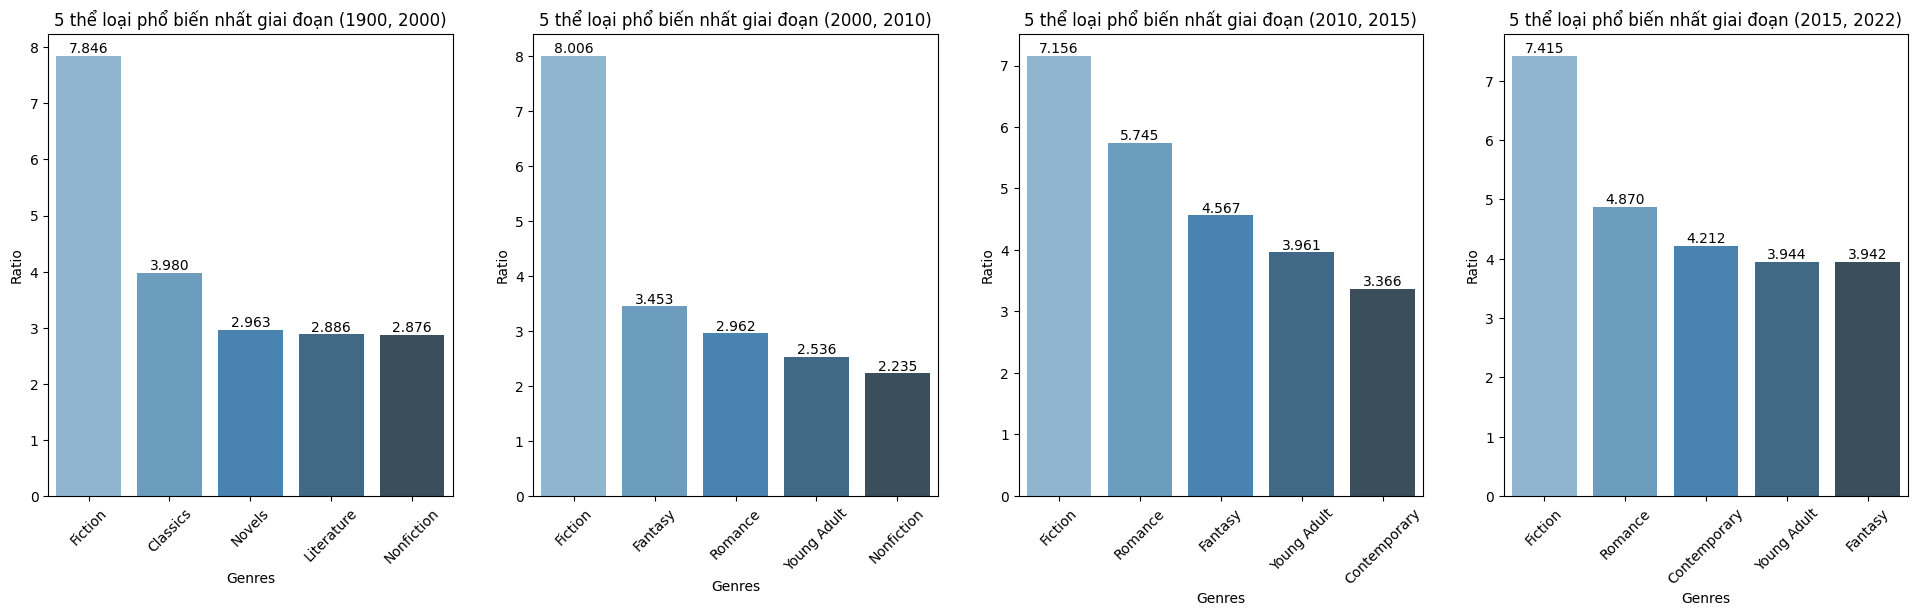

In [49]:
stages = [(1900,2000),(2000,2010),(2010,2015),(2015,2022)]
fig, ax = plt.subplots(1,4,figsize = (24,6))
for i, stage in enumerate(stages):
    survey_df_i = surver_df[(surver_df['publishDate_Year'] >= stage[0]) & (surver_df['publishDate_Year'] < stage[1])]
    length = len(survey_df_i.genres.explode())
    distribution = pd.DataFrame(survey_df_i.genres.explode().value_counts()[:5]/length*100).reset_index()
    distribution.columns = ['genres','ratio']
    sns.barplot(x='genres', y='ratio', data = distribution, ax = ax[i], palette='Blues_d')
    ax[i].bar_label(ax[i].containers[0], fmt='%1.3f', label_type='edge', fontsize=10)
    ax[i].set_title(f'5 thể loại phổ biến nhất giai đoạn {stage}')
    ax[i].set_xlabel('Genres')
    ax[i].set_ylabel('Ratio')
    ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation = 45)

- Ta có thể thấy thể loại Fiction luôn đứng đầu trong mọi giai đoạn
- Càng về sau, thể loại Romance dần vượt lên
- Sẽ thêm nhận xét sau.

## 5.3 Question 3: Làm sao để tìm đọc những cuốn sách tương tự với một cuốn sách mình yêu thích?

### 5.3.1 Does it need to have preprocessing step, and if yes, how does your group preprocess?

Để thực hiện câu hỏi này, ta cần thiết lập ma trận TF-IDF dựa trên các thể loại.<br>
Trước khi đi vào bước tiền xử lí dữ liệu, em sẽ giải thích định nghĩa về TF-IDF: là một thước đo thống kê đánh giá mức độ quan trọng của một từ với một tài liệu trong bộ sưu tập tài liệu.<br>
**Các bước:**
- Xây dựng ma trận với với số dòng tương ứng với số lượng sách và số cột tương ứng với số từ được tách ra từ "genres"
- Tính ma trận TF-IDF

Xây dựng ma trận với với số dòng tương ứng với số lượng sách và số cột tương ứng với số từ được tách ra từ "genres"

In [50]:
one_hot_df = pd.get_dummies(df['genres'].apply(pd.Series).stack()).groupby(level=0).sum()
one_hot_df.index = df['title'].values

Tính ma trận TF-IDF

In [51]:
tfidf_transformer = TfidfTransformer()
tfidf_matrix = tfidf_transformer.fit_transform(one_hot_df)
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=one_hot_df.columns, index = one_hot_df.index)

### 5.3.2 How does your group analyze data to answer the question?

- Em sẽ lọc ra những cuốn sách có ratings $\geq$ 4.5 để nâng cao chất lượng của hệ thống gợi ý.
- Em sử dụng độ tương tự cosine để tính toán một đại lượng số biểu thị sự giống nhau giữa tất cả cuốn sách với các cuốn sách có ratings $\geq$ 4.5

**Chú ý:** Tuy nhiên, vì lượng dữ liệu lớn nên việc lưu trữ và tính toán độ tương đồng giữa các cuốn sách cùng một lúc là không khả thi vì nó có thể dẫn đến các vấn đề về bộ nhớ. Cho nên em đề xuất một giải pháp là sử dụng batch_size, nghĩa là ở mỗi bước, ta sẽ tính toán độ tương đồng giữa các các cuốn sách trong batch_size với toàn bộ dataset và lưu trữ trên ma trận (batch_size,m)(Với m là số lượng sách có ratings lớn hơn 4.5).

**Khởi tạo batch_size = 128**

In [52]:
batch_size = 256
start = 0
end = batch_size

**Lọc ra những cuốn sách có ratings $\geq$ 4.5**

In [53]:
df_ratings = df[df['rating']>=4.5]
tfidf_ratings_df = tfidf_df[(df['rating']>=4.5).values]

**Tính toán cosine similarity**

In [54]:
num_epoch = df.shape[0]//batch_size + 1
cosine_sim_dict = {}
for i in range(num_epoch):
    cosine_sim_df = cosine_similarity(tfidf_df[start:end], tfidf_ratings_df)
    cosine_sim_batch = pd.DataFrame(cosine_sim_df, index=one_hot_df.index[start:end], columns=tfidf_ratings_df.index)
    cosine_sim_dict[i] = cosine_sim_batch
    start += batch_size
    end += batch_size

**Xây dựng hệ thống gợi ý**

In [55]:
def Content_based_RS(cosine_sim_dict, book_title,n):
    idx = df[df['title'] == book_title].index[0]
    i = idx // batch_size
    result = cosine_sim_dict[i][cosine_sim_dict[i].index == book_title].squeeze().nlargest(n)
    name, score = result.index, result.values
    return name, score

In [56]:
book_title = 'Daughter of Helaman'
n = 5
name, score = Content_based_RS(cosine_sim_dict,'Daughter of Helaman',n)
top_n_book = pd.DataFrame([name,score], index = ['Title','Cosine Similarity']).transpose()

In [57]:
top_n_book

,Title,Cosine Similarity
0,The Work and the Glory 9 volumes,0.780871
1,Fire of the Covenant: The Story of the Willie ...,0.61016
2,The Sweet Evil Complete Collection: Sweet Evil...,0.384329
3,Fablehaven; Rise of the Evening Star; Grip of ...,0.366462
4,Seasons of Love and War,0.364182


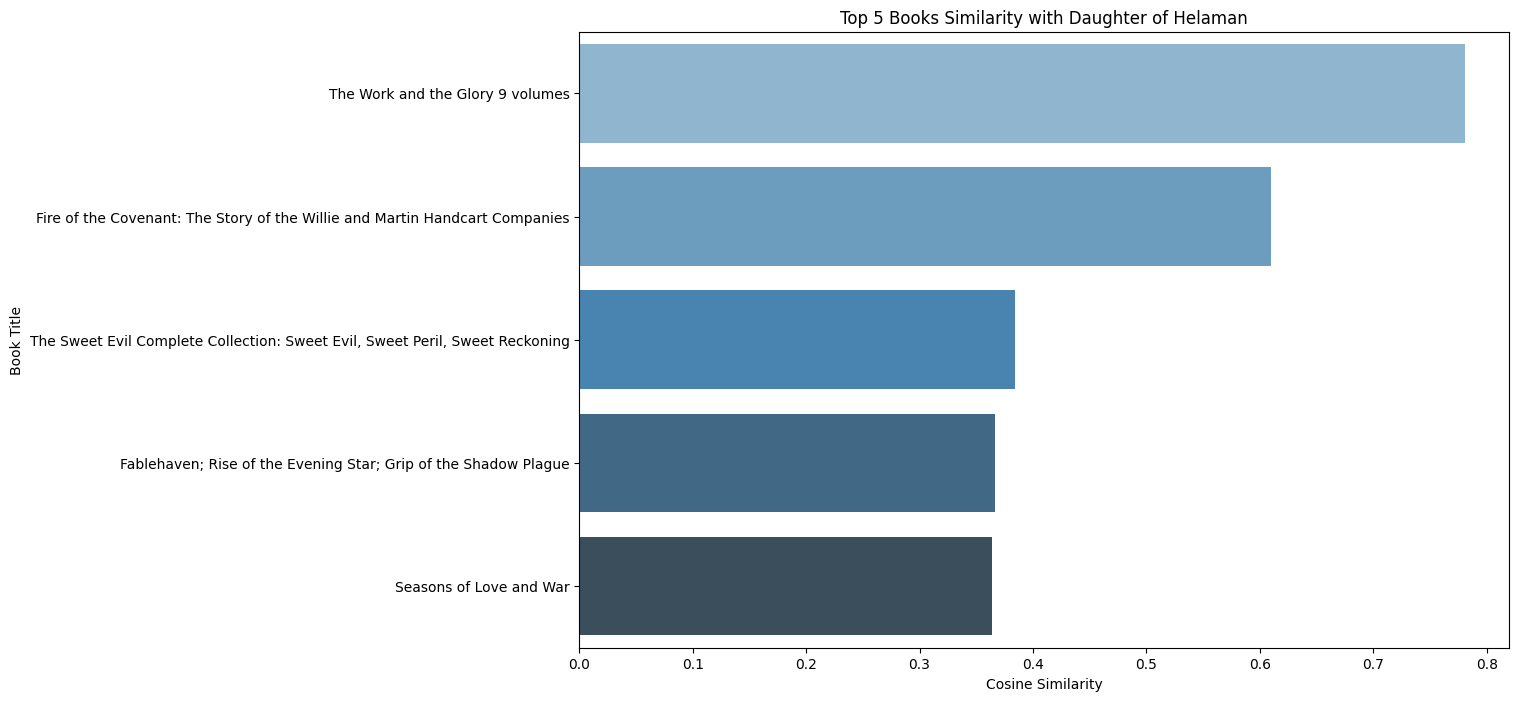

In [58]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Cosine Similarity', y='Title', data=top_n_book, palette='Blues_d')
plt.title(f'Top {n} Books Similarity with {book_title}')
plt.xlabel('Cosine Similarity')
plt.ylabel('Book Title')
plt.show()

## 5.4 Question 4: Thể loại (genres) thường viết của tác giả là gì?

### 5.4.1 Does it need to have preprocessing step, and if yes, how does your group preprocess?

In [59]:
backup_df = df.copy()

In [60]:
df['author']

0                              [Suzanne Collins]
1                 [J.K. Rowling, Mary GrandPré ]
2                                   [Harper Lee]
3                  [Jane Austen, Anna Quindlen ]
4                              [Stephenie Meyer]
                          ...                   
52473                           [Cheri Schmidt ]
52474                            [Emma Michaels]
52475                          [Kim Richardson ]
52476    [Tom Pollack , John Loftus , Jim Alves]
52477                            [Misty Moncur ]
Name: author, Length: 52428, dtype: object

**Text**
- Để trả lời câu hỏi trên, ta cần cột dữ liệu liên quan đến tác giả (author), và genres, vì phần xử lý ở trên, đã đưa thành list các tác giả, hay genres, và cũng như xóa các vai trò, nên không cần tiền xử lý nữa.
- Ở đây ta sẽ chỉ khảo sát 10 tác giả (thay đổi giá trị biến để thay đổi giá trị khảo sát), và ta sẽ lấy 10 tác giả xuất hiện nhiều nhất (tức tham gia nhiều bài viết nhất).

**Code**

In [61]:
num_author = 10
list_authors = df['author'].explode().apply(lambda x: x.strip()).value_counts()[0:num_author].index.tolist()
list_authors

['Stephen King',
 'Nora Roberts',
 'James Patterson',
 'Agatha Christie',
 'Anonymous',
 'Erin Hunter',
 'Neil Gaiman',
 'Terry Pratchett',
 'Meg Cabot',
 'J.D. Robb']

### 5.4.2 How does your group analyze data to answer the question?

**Text**
- Để dễ xử lý, vì cột genres, và tác giả là dữ liệu đa phân loại (multi categoricals), ta sẽ sử dụng kĩ thuật one hot encoding (giống bài thực hành 3 vừa rồi), để đưa về số cho dễ xử lý. (Các giá trị là 1 tức là xuất hiện).
- Sau khi đưa về được one hot encoding hai cột author và genres, ta dễ dàng groupby các tác giả, và có được thông tin về các loại mà tác giả tham gia, tương tự, ta cũng sẽ chỉ lấy 10 loại nhiều nhất của tác giả (sửa tương tự - vào biến), để khảo sát. Ta sẽ khảo sát bằng cách vẽ đồ thị histogram, các cột tương ứng sẽ tùy theo số lượng genres mà tác giả tham gia đóng góp.
- Trong cột tác giả, các tác giả khác (ngoài các tác giả trong list khảo sát trên, sẽ được xử lý thành khác).

**Code**

In [62]:
#Tính one hot encoding cho
Q2_df = df[['author','genres']]
Q2_df['author'] = Q2_df['author'].explode().apply(lambda x: x.strip()).apply(lambda x: x if x in list_authors else "Other").reset_index().groupby('index').agg(list)['author']
#Convert to one_hot_df
Q2_one_hot_df = pd.DataFrame()
for column in Q2_df:
    temp_df = Q2_df[column].str.join(',').str.get_dummies(sep=',').add_prefix(str(column)+'_')
    Q2_one_hot_df =pd.concat([Q2_one_hot_df,temp_df],axis=1)

Q2_one_hot_df.head(5)

<ipython-input-62-d2c2268f3cda>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Q2_df['author'] = Q2_df['author'].explode().apply(lambda x: x.strip()).apply(lambda x: x if x in list_authors else "Other").reset_index().groupby('index').agg(list)['author']


,author_Agatha Christie,author_Anonymous,author_Erin Hunter,author_J.D. Robb,author_James Patterson,author_Meg Cabot,author_Neil Gaiman,author_Nora Roberts,author_Other,author_Stephen King,...,genres_Young Adult Paranormal,genres_Young Adult Romance,genres_Young Adult Science Fiction,genres_Young Readers,genres_Yuri,genres_Zambia,genres_Zen,genres_Zimbabwe,genres_Zombies,genres_漫画
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [63]:
#Xử lý để lấy các loại phổ biến nhất của từng tác giả.
top_num = 10 #Take only top_num genres
survey_authors = pd.DataFrame()
for author in list_authors:
    # print(author)
    survey_authors[author] = [Q2_one_hot_df.groupby('author_'+author).sum().iloc[1,:].nlargest(top_num).to_dict()]

survey_authors

,Stephen King,Nora Roberts,James Patterson,Agatha Christie,Anonymous,Erin Hunter,Neil Gaiman,Terry Pratchett,Meg Cabot,J.D. Robb
0,"{'genres_Fiction': 107, 'genres_Horror': 107, ...","{'genres_Fiction': 104, 'genres_Romance': 104,...","{'genres_Fiction': 100, 'author_Other': 69, 'g...","{'genres_Mystery': 88, 'genres_Fiction': 87, '...","{'genres_Nonfiction': 50, 'genres_Religion': 5...","{'genres_Fantasy': 80, 'genres_Cats': 77, 'gen...","{'genres_Fiction': 72, 'genres_Fantasy': 71, '...","{'genres_Fantasy': 69, 'genres_Fiction': 69, '...","{'genres_Young Adult': 64, 'genres_Fiction': 6...","{'genres_Fiction': 65, 'genres_Mystery': 65, '..."


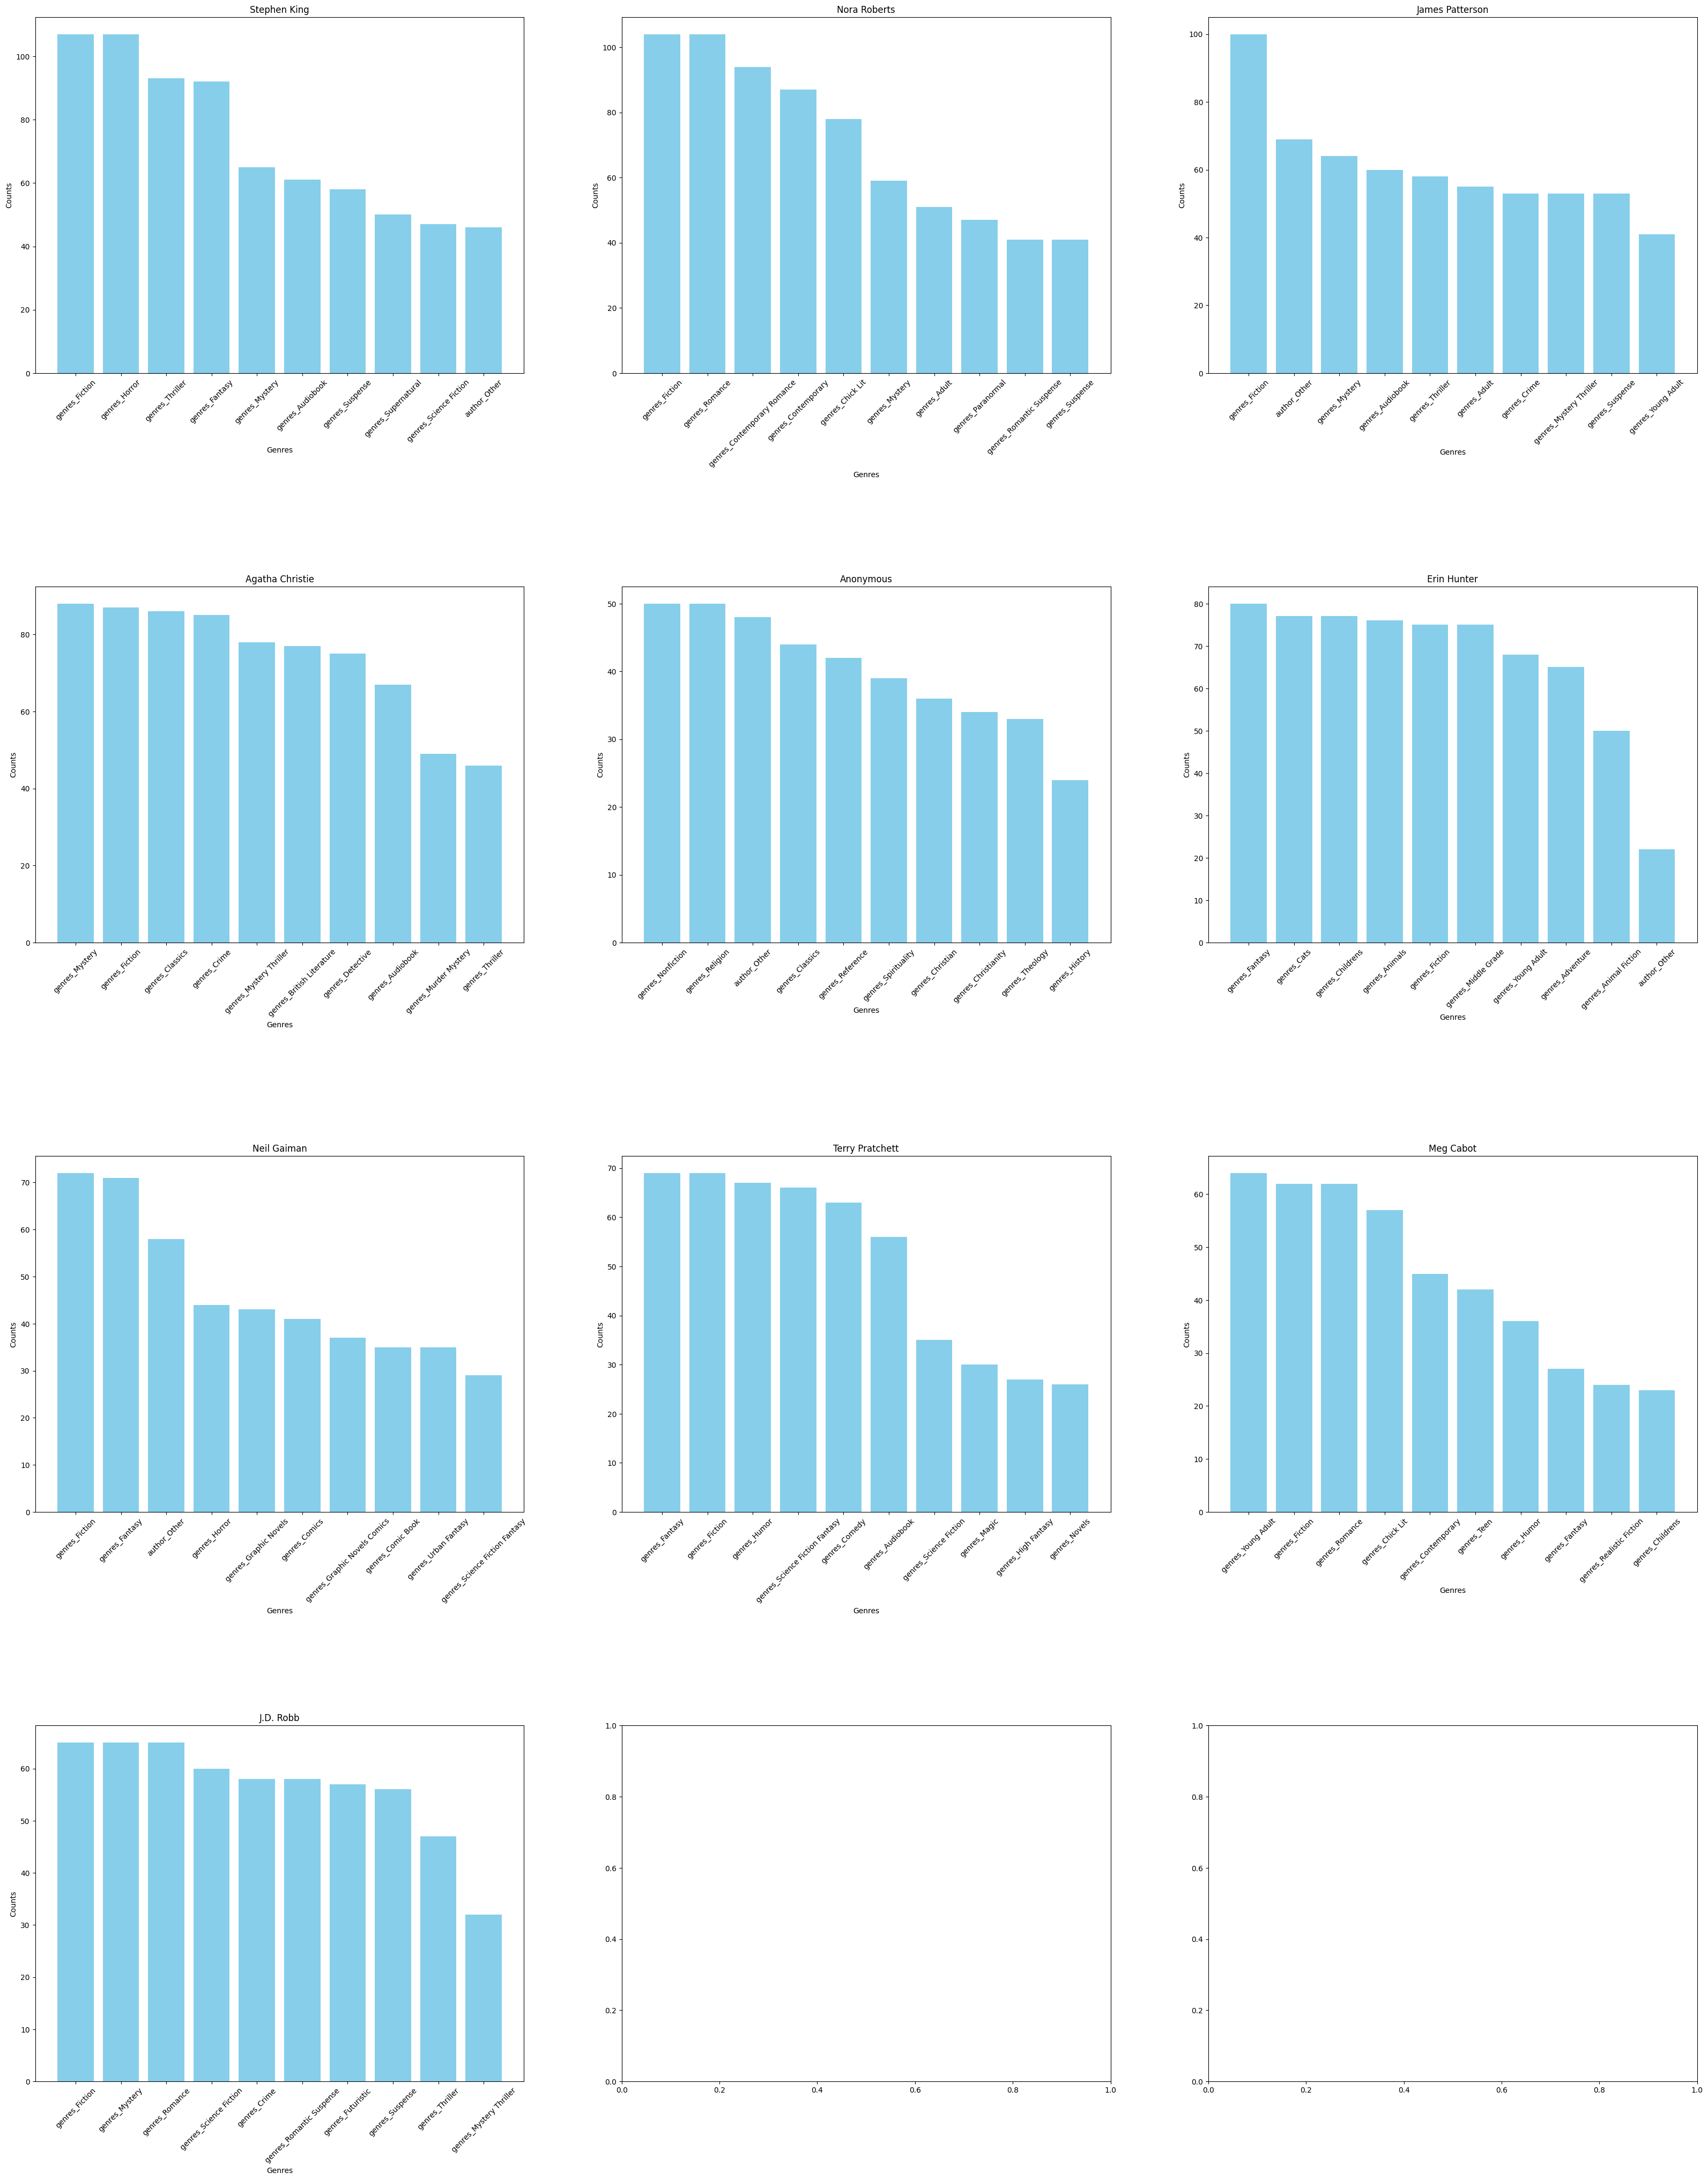

In [64]:
#Vẽ đồ thị
# Creating a 3x4 grid of plots
fig, axs = plt.subplots(int((num_author)/3)+1, 3, figsize=(40, 50))
plt.subplots_adjust(hspace=0.6)

def plot_survey(survey_authors,name):
    data = survey_authors[name].values[0]
    genres = list(data.keys())
    counts = list(data.values())
    # top_items = dict(sorted(counter.items(), key=lambda x: x[1], reverse=True)[:n])
    plt.bar(genres, counts, color='skyblue')
    plt.xlabel('Genres')
    plt.ylabel('Counts')
    plt.title(f'{column}')
    plt.xticks(rotation=45)

for i, column in enumerate(survey_authors):
    # print(multiple_cate_profile[column]['distribution'])
    row = i // 3
    col = i % 3
    plt.subplot(int((num_author-1)/3)+1, 3, i + 1)
    # plot_top_n(counter_dict, 5)
    plot_survey(survey_authors,column)

**Kết luận**:
- Từ dữ liệu đồ thị trên, ta hoàn toàn có thể biết được tác giả mình đang tìm hiểu, có thể có xu hướng viết các loại nào.
- Ví dụ Stephen King, với genres Fiction and Horror, ông tham gia hơn 100 bài...

In [65]:
df = backup_df.copy()

# 6. Reflection

**6.1. Each member**:

- 21120255-Nguyễn Đặng Nhật Huy: Hiểu các công đoạn về xử lí dữ liệu.
- 21120291-Nguyễn Đức Nam:
- 21120463-Lê Hữu Hưng:

**6.2. Your Group**:
- Khó khăn:Việc tìm dữ liệu sao cho có thể áp dụng phân tích dữ liệu (NaN values,..), các kiến thức của môn học (hệ thống khuyến nghị, one_hot_encoding...), nhiều hàng (hơn 5000 dòng), nhiều đặc trưng (trên 10 cột).
- Nếu có nhiều thời gian hơn, nhóm em sẽ thực hiện deploy một web chatbot với mục đích truy xuất dữ liệu về các cuốn sách, tìm kiếm sách dựa trên recommender system.

# 7. References

- Kaggle.
- Bài giảng trên lớp và bài tập Thực hành.